In [17]:
import pandas as pd

# Load with no header and assign column names
columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
           'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
           'Impulsiveness', 'SensationSeeking',
           'Alcohol', 'Amphetamines', 'AmylNitrite', 'Benzos', 'Caffeine',
           'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy',
           'Heroin', 'Ketamine', 'LegalHighs', 'LSD', 'Methadone',
           'Mushrooms', 'Nicotine', 'Semer', 'VSA']

df = pd.read_csv("Drug_Consumption.csv", header=None, names=columns)

df['Gender'] = df['Gender'].astype(str).str.strip().str.upper()

# Map to full labels
df['Gender'] = df['Gender'].map({'M': 'Male', 'F': 'Female'})


df = df.dropna(subset=['Gender'])

# Confirm cleanup
print(df['Gender'].unique())


['Male' 'Female']


In [18]:
cl_mapping = {
    'CL0': 0,
    'CL1': 1, 'CL2': 1, 'CL3': 1,
    'CL4': 1, 'CL5': 1, 'CL6': 1
}

drug_cols = ['Alcohol', 'Amphetamines', 'AmylNitrite', 'Benzos', 'Caffeine',
             'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy',
             'Heroin', 'Ketamine', 'LegalHighs', 'LSD', 'Methadone',
             'Mushrooms', 'Nicotine', 'Semer', 'VSA']

for col in drug_cols:
    df[col] = df[col].replace(cl_mapping).astype(int)

/tmp/ipython-input-18-3751341941.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(cl_mapping).astype(int)
/tmp/ipython-input-18-3751341941.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(cl_mapping).astype(int)
/tmp/ipython-input-18-3751341941.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `p

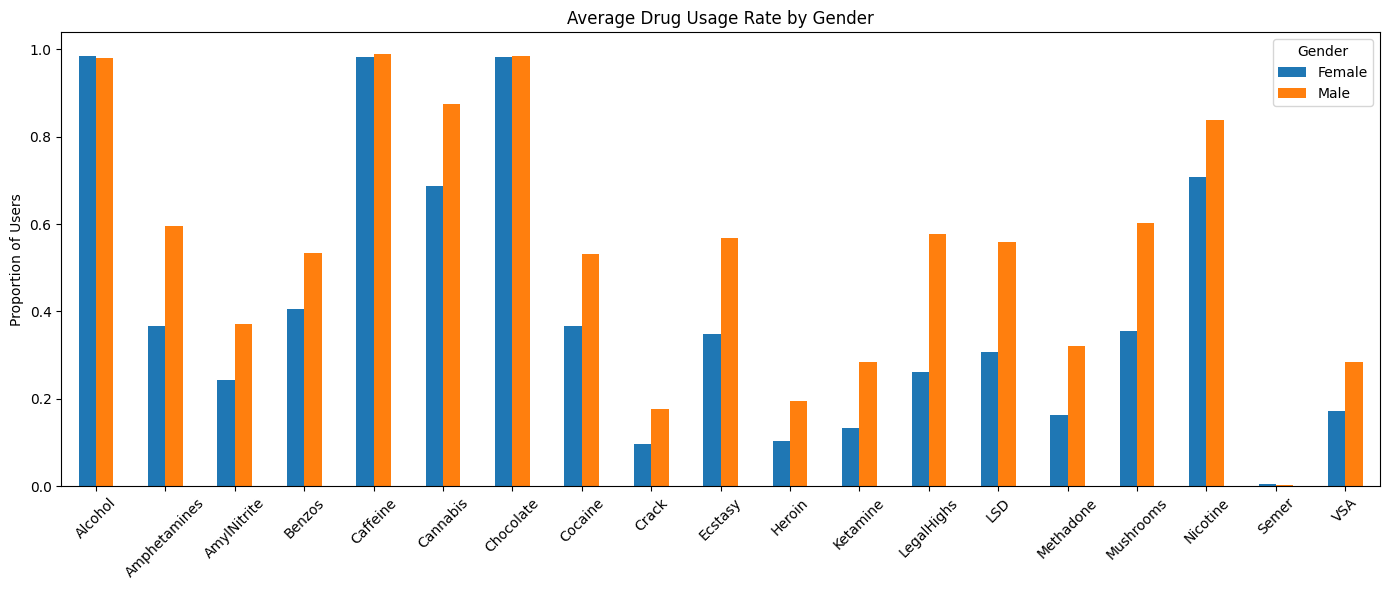

In [19]:
gender_usage = df.groupby('Gender')[drug_cols].mean().T

gender_usage.plot(kind='bar', figsize=(14,6), title='Average Drug Usage Rate by Gender')
plt.ylabel("Proportion of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

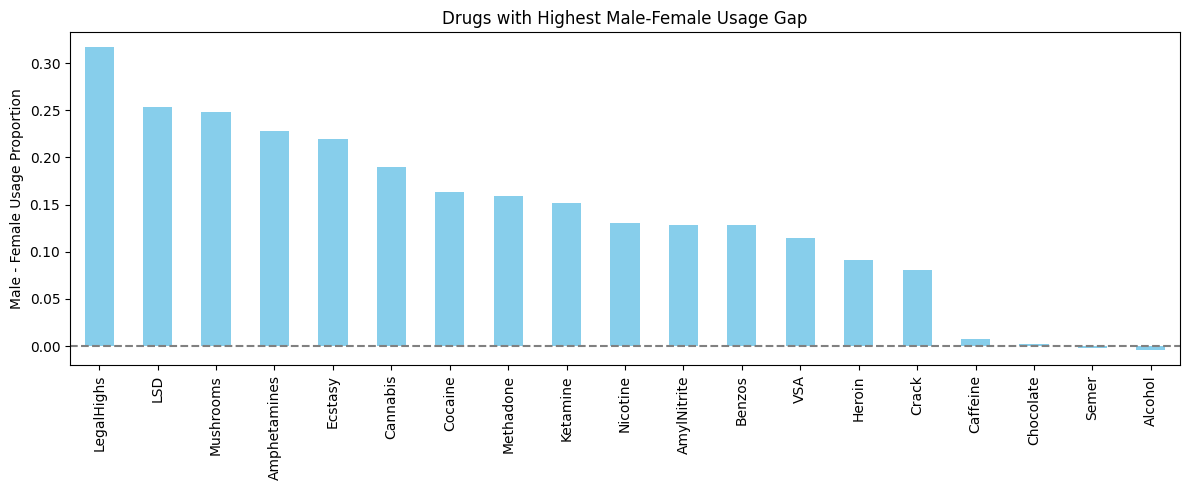

In [20]:
#top 5 gender differences(sorted bar chart)
gender_diff = gender_usage['Male'] - gender_usage['Female']
gender_diff.sort_values(ascending=False).plot(kind='bar', color='skyblue', figsize=(12,5), title='Drugs with Highest Male-Female Usage Gap')
plt.ylabel("Male - Female Usage Proportion")
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


In [22]:
#chisquare test
from scipy.stats import chi2_contingency

for drug in drug_cols:
    contingency = pd.crosstab(df['Gender'], df[drug])
    chi2, p, dof, ex = chi2_contingency(contingency)
    if p < 0.05:
        print(f"✅ Significant difference in {drug} use by gender (p = {p:.4f})")
    else:
        print(f"❌ No significant difference in {drug} use by gender (p = {p:.4f})")


❌ No significant difference in Alcohol use by gender (p = 0.6080)
✅ Significant difference in Amphetamines use by gender (p = 0.0000)
✅ Significant difference in AmylNitrite use by gender (p = 0.0000)
✅ Significant difference in Benzos use by gender (p = 0.0000)
❌ No significant difference in Caffeine use by gender (p = 0.2426)
✅ Significant difference in Cannabis use by gender (p = 0.0000)
❌ No significant difference in Chocolate use by gender (p = 0.8537)
✅ Significant difference in Cocaine use by gender (p = 0.0000)
✅ Significant difference in Crack use by gender (p = 0.0000)
✅ Significant difference in Ecstasy use by gender (p = 0.0000)
✅ Significant difference in Heroin use by gender (p = 0.0000)
✅ Significant difference in Ketamine use by gender (p = 0.0000)
✅ Significant difference in LegalHighs use by gender (p = 0.0000)
✅ Significant difference in LSD use by gender (p = 0.0000)
✅ Significant difference in Methadone use by gender (p = 0.0000)
✅ Significant difference in Mushroo

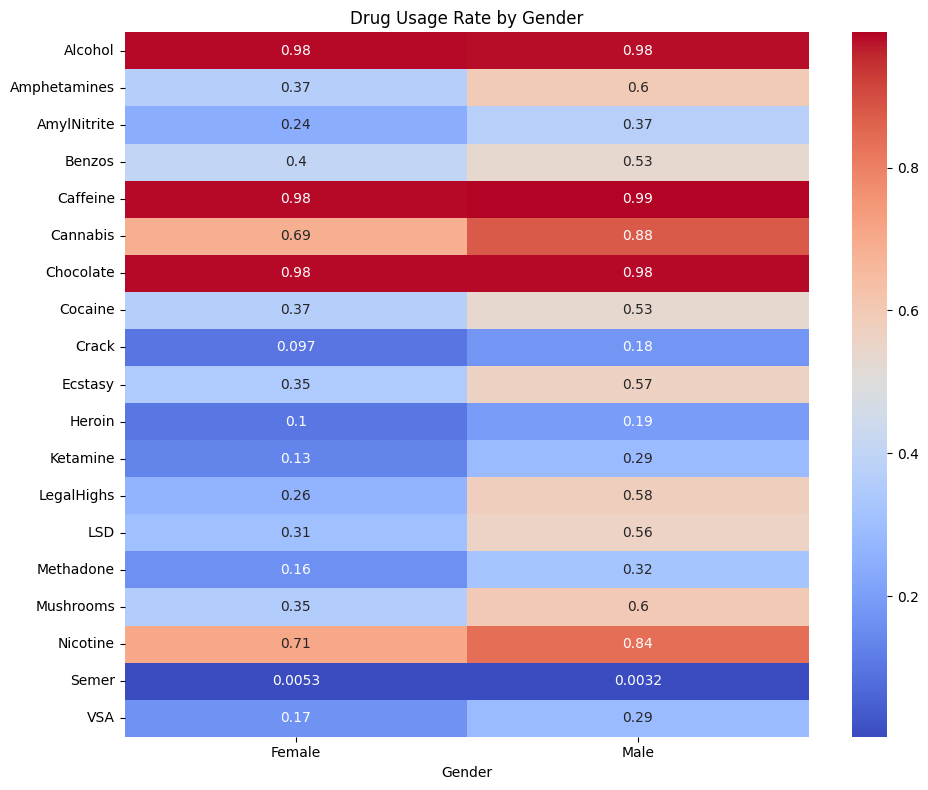

In [23]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(gender_usage, annot=True, cmap='coolwarm')
plt.title("Drug Usage Rate by Gender")
plt.tight_layout()
plt.show()
